# Inferential Statistics

Inferential statistics help you come to conclusions and make predictions based on your data.

When you have collected data from a sample, you can use inferential statistics to understand the larger population from which the sample is taken.

Inferential statistics have two main uses:

- making estimates about populations (for example, the mean SAT score of all 11th graders in the US).
- testing hypotheses to draw conclusions about populations (for example, the relationship between SAT scores and family income).

**Confidence intervals**

A confidence interval uses the variability around a statistic to come up with an interval estimate for a parameter. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('coffee_dataset.csv')

In [4]:
df.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [5]:
df.shape

(2974, 4)

In [6]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200)
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


In [7]:
print(coffee_red.head())
coffee_red.info()

      user_id   age  drinks_coffee     height
2402     2874   <21           True  64.357154
2864     3670  >=21           True  66.859636
2167     7441   <21          False  66.659561
507      2781  >=21           True  70.166241
1817     2875  >=21           True  71.369120
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 2402 to 1422
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        200 non-null    int64  
 1   age            200 non-null    object 
 2   drinks_coffee  200 non-null    bool   
 3   height         200 non-null    float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 6.4+ KB


In [8]:
#proportion of coffee drinkers in sample
mean_drinker = coffee_red['drinks_coffee'].mean()
mean_non_drinker = 1 - mean_drinker

In [9]:
print(mean_drinker)
print(mean_non_drinker)

0.595
0.405


In [10]:
#average height of coffee drinker
drink_height = coffee_red[coffee_red['drinks_coffee']]['height'].mean()
drink_height

68.11962990858618

In [11]:
#average height of non coffee drinker
non_drink_height = coffee_red[-coffee_red['drinks_coffee']]['height'].mean()
non_drink_height

66.78492279927877

In [12]:
#bootstrap sample of 200 draws
bootsamp = coffee_red.sample(200, replace = True)
bootsamp['drinks_coffee'].mean()

0.605

(array([  16.,  106.,  590., 1830., 2990., 2644., 1352.,  377.,   86.,
           9.]),
 array([65.24631713, 65.56293231, 65.8795475 , 66.19616268, 66.51277787,
        66.82939305, 67.14600823, 67.46262342, 67.7792386 , 68.09585379,
        68.41246897]),
 <BarContainer object of 10 artists>)

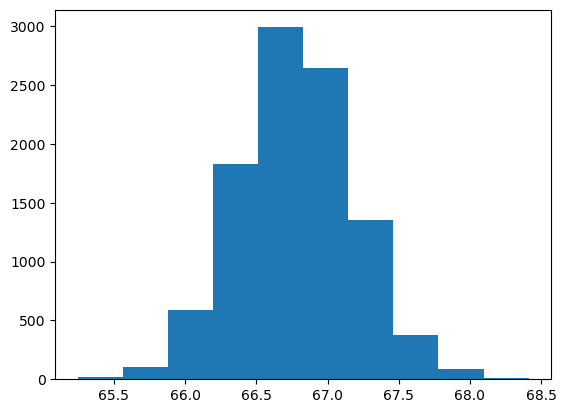

In [14]:
#bootstrap sample 10000 times
boot_means = []
for _ in range(10000) :
    bootsamp = coffee_red.sample(200, replace = True)
    mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(mean)
plt.hist(boot_means)

In [15]:
#obtain 95% confidence interval
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.99291328157521, 67.58402738281573)

In [16]:
#compare between full data and sample data mean
coffee_full[coffee_full['drinks_coffee']==False]['height'].mean()

66.44340776214703

**Conclusion**

the average between the sample and the full data is not much different, that means the sample already describes the data as a whole